In [209]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

In [210]:
save_folder = 'data_nan_mean_no_Island_70_percent'
X_train = pd.read_csv('../data/' + save_folder + '/X_train.csv').values
y_train = pd.read_csv('../data/' + save_folder + '/y_train.csv').values
X_test = pd.read_csv('../data/' + save_folder + '/X_test.csv').values
y_test = pd.read_csv('../data/' + save_folder + '/y_test.csv').values


y_train = np.squeeze(y_train)
n_values = np.max(y_train) + 1
y_train = np.eye(n_values)[y_train]

def getData(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_NaNmean.csv')
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/valid_data_NaNmean.csv')
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values

    y_train = np.squeeze(y_train)
    n_values = np.max(y_train) + 1
    y_train = np.eye(n_values)[y_train]

    y_valid = np.squeeze(y_valid)
    n_values = np.max(y_valid) + 1
    y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

def getDataNormalization(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_Normalization.csv')
    #X_train = train_data.drop(['Species', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], axis = 1).values
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_valid.csv')
    #X_valid = valid_data.drop(['Species', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], axis = 1).values
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values
    
    # label should be int
    y_train = np.floor(y_train + 1.1).astype(int)
    y_train = np.squeeze(y_train)
    n_values = np.max(y_train) + 1
    y_train = np.eye(n_values)[y_train]
    
    # label should be int
    y_valid = np.floor(y_valid + 1.1).astype(int)
    y_valid = np.squeeze(y_valid)
    n_values = np.max(y_valid) + 1
    y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

def getTestData():
    save_folder = 'train_0.5_valid_0.7_test'
    test_data = pd.read_csv('../data/' + save_folder + '/test_data_NaNmean.csv')
    X_test = test_data.drop(['Species'], axis = 1).values
    y_test = test_data[['Species']].copy().values

    y_test = np.squeeze(y_test)
    n_values = np.max(y_test) + 1
    # print(n_values)
    y_test = np.eye(n_values)[y_test]

    return X_test, y_test

def getTestDataNormalization(num_sample):
    save_folder = 'train_0.5_valid_0.7_test'
    test_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_sample) + '_test.csv')
    X_test = test_data.drop(['Species'], axis = 1).values
    y_test = test_data[['Species']].copy().values
    
    y_test = np.floor(y_test + 1.1).astype(int)
    y_test = np.squeeze(y_test)
    n_values = np.max(y_test) + 1
    y_test = np.eye(n_values)[y_test]
    return X_test, y_test


In [359]:

def runRandomForest(n_estimators, criterion, X_train, y_train, X_valid, y_valid, max_features='auto'):
    penguin = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_features=max_features, random_state=8500)
    penguin.fit(X_train,y_train)

    y_predict = penguin.predict(X_valid)
    y_predict = np.argmax(y_predict, axis=1)
    y_test_label = np.argmax(y_valid, axis=1)

    score = sum(y_predict==y_test_label)/y_valid.shape[0]
    # labels = ["Adelie", "Chinstrap", "Gentoo"]

    # cm = confusion_matrix(y_test_label, y_predict)

    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

    # disp.plot(cmap=plt.cm.Blues)
    # # plt.savefig('../pics/random_forest/confusion_matrix')
    # # plt.savefig('../pics/random_forest/confusion_matrix.pdf')
    # plt.show()
    return (score, penguin)

#predict test
def predictRandomForest(model, X_test, y_test):
    y_predict = model.predict(X_test)
    y_predict = np.argmax(y_predict, axis=1)
    y_test_label = np.argmax(y_test, axis=1)
    score = sum(y_predict==y_test_label)/y_test.shape[0]
    
    predict_score.append(score)
    return score

In [368]:
X_train, y_train, X_valid, y_valid = getData(50)
his_1_score = []
his_2_score = []
his_3_score = []

his_1_NaN_Mean_model = []
his_2_NaN_Mean_model = []
his_3_NaN_Mean_model = []

n_estimators = [1000, 2000, 3000]
for i in n_estimators:
    (his_1, model1) = runRandomForest(i, 'entropy', X_train, y_train, X_valid, y_valid)
    his_1_score.append(his_1)
    his_1_NaN_Mean_model.append(model1)

X_train, y_train, X_valid, y_valid = getData(110)
for i in n_estimators:
    (his_2, model2) = runRandomForest(i, 'entropy', X_train, y_train, X_valid, y_valid)
    his_2_score.append(his_2)
    his_2_NaN_Mean_model.append(model2)

X_train, y_train, X_valid, y_valid = getData(170)
for i in n_estimators:
    (his_3, model3) = runRandomForest(i, 'entropy', X_train, y_train, X_valid, y_valid)
    his_3_score.append(his_3)
    his_3_NaN_Mean_model.append(model3)


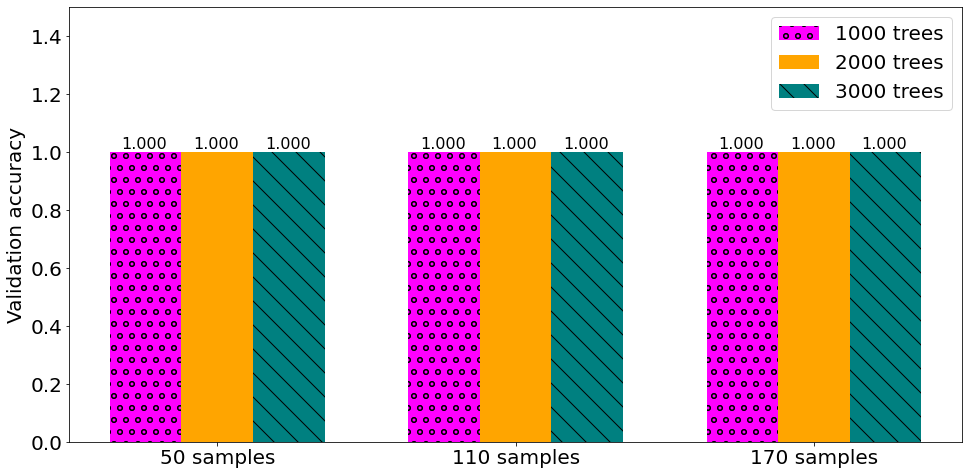

In [369]:
objects = ('50 samples', '110 samples', '170 samples')
y_pos = np.arange(len(objects))
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = '20'

estimators_100 = [his_1_score[0], his_2_score[0], his_3_score[0]]
estimators_200 = [his_1_score[1], his_2_score[1], his_3_score[1]]
estimators_300 = [his_1_score[2], his_2_score[2], his_3_score[2]]

for index, value in enumerate(estimators_100):
    plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(estimators_200):
    plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(estimators_300):
    plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)

bars_100_estimators = plt.bar(y_pos - 0.24, estimators_100, 0.24, label = str(n_estimators[0]) + ' trees', color = 'magenta')
plt.bar(y_pos, estimators_200, 0.24, label = str(n_estimators[1]) + ' trees', color = 'orange')
bars_300_estimators = plt.bar(y_pos + 0.24, estimators_300, 0.24, label = str(n_estimators[2]) + ' trees', color = 'teal')

plt.xticks(y_pos, objects)
plt.ylim([0, 1.5])
plt.ylabel("Validation accuracy")
patterns = ("o", "o", "o")
for i, x in zip(bars_100_estimators,patterns):
      i.set_hatch(x)
patterns = ("\\", "\\", "\\")
for i, x in zip(bars_300_estimators,patterns):
      i.set_hatch(x)
plt.legend(fontsize = 20)
#plt.margins(0.1,0)
plt.savefig('../pics/ANN/activation_with_different_data.svg', bbox_inches='tight')
plt.savefig('../pics/ANN/activation_with_different_data.pdf', bbox_inches='tight')
plt.show()


In [370]:
import joblib
#chose these best model to save 
model_1_NaN = np.array(his_1_NaN_Mean_model, dtype=object)
score_1_NaN = np.array(his_1_score)

m_score_1_NaN = max(score_1_NaN)
index_max_model_1_NaN = np.where((score_1_NaN == m_score_1_NaN))[0]
max_model_1_NaN = model_1_NaN[index_max_model_1_NaN]  
name_model__1_NaN = []
for i in index_max_model_1_NaN:
    s = "50_samples_" + str((i%3) * 10 + 10) + "_trees_" + "data_NaN_Mean" 
    joblib.dump(his_1_NaN_Mean_model[i], "../results/model/data_NaN_Mean/random_forest/" + s + ".joblib")
    print(i, s)

model_2_NaN = np.array(his_2_NaN_Mean_model, dtype=object)
score_2_NaN = np.array(his_2_score)
m_score_2_NaN = max(score_2_NaN)
index_max_model_2_NaN = np.where((score_2_NaN == m_score_2_NaN))[0]
max_model_2_NaN = model_2_NaN[index_max_model_2_NaN]  
name_model__2_NaN = []
for i in index_max_model_2_NaN:
    s = "110_samples_" + str((i%3) * 10 + 10) + "_trees_" + "data_NaN_Mean" 
    joblib.dump(his_2_NaN_Mean_model[i], "../results/model/data_NaN_Mean/random_forest/" + s + ".joblib")
    print(i, s)

model_3_NaN = np.array(his_3_NaN_Mean_model, dtype=object)
score_3_NaN = np.array(his_3_score)
m_score_3_NaN = max(score_3_NaN)
index_max_model_3_NaN = np.where((score_3_NaN == m_score_3_NaN))[0]
max_model_3_NaN = model_3_NaN[index_max_model_3_NaN]  
name_model__3_NaN = []
for i in index_max_model_3_NaN:
    s = "170_samples_" + str((i%3) * 10 + 10) + "_trees_" + "data_NaN_Mean" 
    joblib.dump(his_3_NaN_Mean_model[i], "../results/model/data_NaN_Mean/random_forest/" + s + ".joblib")
    print(i, s)



0 50_samples_10_trees_data_NaN_Mean
1 50_samples_20_trees_data_NaN_Mean
2 50_samples_30_trees_data_NaN_Mean
0 110_samples_10_trees_data_NaN_Mean
1 110_samples_20_trees_data_NaN_Mean
2 110_samples_30_trees_data_NaN_Mean
0 170_samples_10_trees_data_NaN_Mean
1 170_samples_20_trees_data_NaN_Mean
2 170_samples_30_trees_data_NaN_Mean


In [371]:
#load model NaN mean
import os

predict_score = []
X_test, y_test = getTestData()

load_models = []
for file in os.listdir("../results/model/data_NaN_Mean/random_forest/"):
    if file.endswith(".joblib"):
        test_model = joblib.load("../results/model/data_NaN_Mean/random_forest/" + file)
        test_score = predictRandomForest(test_model, X_test, y_test)
        print(file + ": " + str(test_score * 100) + "%")

110_samples_10_trees_data_NaN_Mean.joblib: 97.11538461538461%
110_samples_20_trees_data_NaN_Mean.joblib: 97.11538461538461%
110_samples_30_trees_data_NaN_Mean.joblib: 97.11538461538461%
170_samples_10_trees_data_NaN_Mean.joblib: 97.11538461538461%
170_samples_20_trees_data_NaN_Mean.joblib: 97.11538461538461%
170_samples_30_trees_data_NaN_Mean.joblib: 97.11538461538461%
50_samples_10_trees_data_NaN_Mean.joblib: 96.15384615384616%
50_samples_20_trees_data_NaN_Mean.joblib: 96.15384615384616%
50_samples_30_trees_data_NaN_Mean.joblib: 96.15384615384616%


In [346]:
X_train, y_train, X_valid, y_valid = getDataNormalization(50)
his_1N_score = []
his_2N_score = []
his_3N_score = []
his_1N_normalization_model = []
his_2N_normalization_model = []
his_3N_normalization_model = []

n_estimators = [10, 20, 30]
for i in n_estimators:
    (his_1N, model_normalization1) = runRandomForest(i, 'entropy', X_train, y_train, X_valid, y_valid, None)
    his_1N_score.append(his_1N)
    his_1N_normalization_model.append(model_normalization1)

X_train, y_train, X_valid, y_valid = getDataNormalization(110)
for i in n_estimators:
    (his_2N, model_normalization2) = runRandomForest(i, 'entropy', X_train, y_train, X_valid, y_valid, None)
    his_2N_score.append(his_2N)
    his_2N_normalization_model.append(model_normalization2)

X_train, y_train, X_valid, y_valid = getDataNormalization(170)
for i in n_estimators:
    (his_3N, model_normalization3) = runRandomForest(i, 'entropy', X_train, y_train, X_valid, y_valid, None)
    his_3N_score.append(his_3N)
    his_3N_normalization_model.append(model_normalization3)



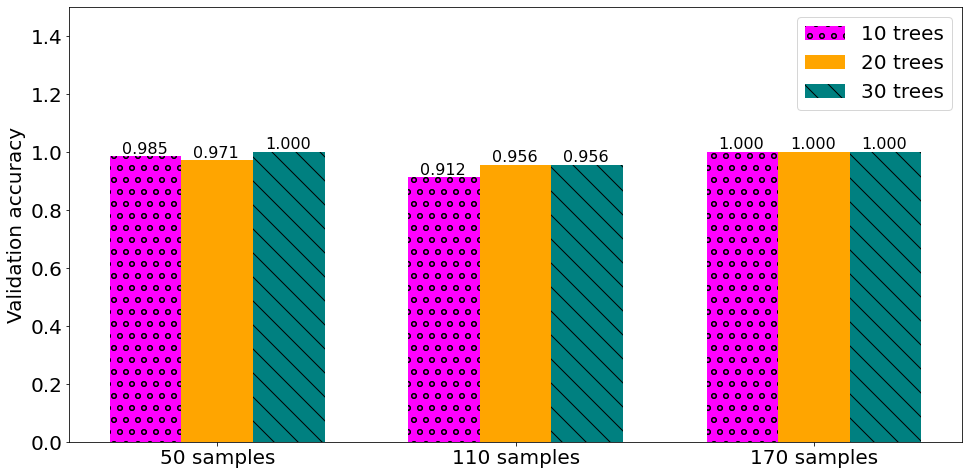

In [347]:
objects = ('50 samples', '110 samples', '170 samples')
y_pos = np.arange(len(objects))
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = '20'

estimators_100N = [his_1N_score[0], his_2N_score[0], his_3N_score[0]]
estimators_200N = [his_1N_score[1], his_2N_score[1], his_3N_score[1]]
estimators_300N = [his_1N_score[2], his_2N_score[2], his_3N_score[2]]

for index, value in enumerate(estimators_100N):
    plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(estimators_200N):
    plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(estimators_300N):
    plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)

bars_10N_estimators = plt.bar(y_pos - 0.24, estimators_100N, 0.24, label = str(n_estimators[0]) + ' trees', color = 'magenta')
plt.bar(y_pos, estimators_200N, 0.24, label = str(n_estimators[1]) + ' trees', color = 'orange')
bars_100N_estimators = plt.bar(y_pos + 0.24, estimators_300N, 0.24, label = str(n_estimators[2]) +' trees', color = 'teal')

plt.xticks(y_pos, objects)
plt.ylim([0, 1.5])
plt.ylabel("Validation accuracy")
patterns = ("o", "o", "o")
for i, x in zip(bars_10N_estimators,patterns):
      i.set_hatch(x)
patterns = ("\\", "\\", "\\")
for i, x in zip(bars_100N_estimators,patterns):
      i.set_hatch(x)
plt.legend(fontsize = 20)
#plt.margins(0.1,0)
plt.savefig('../pics/ANN/activation_with_different_data.svg', bbox_inches='tight')
plt.savefig('../pics/ANN/activation_with_different_data.pdf', bbox_inches='tight')
plt.show()


In [267]:
import joblib
#chose these best model to save 
model_1N_normalization = np.array(his_1N_normalization_model, dtype=object)
score_1N_normalization = np.array(his_1N_score)

m_score_1N_normalization = max(score_1N_normalization)
index_max_model_1N_normalization = np.where((score_1N_normalization == m_score_1N_normalization))[0]
max_model_1N_normalization = model_1N_normalization[index_max_model_1N_normalization]  
name_model__1N_normalization = []
for i in index_max_model_1N_normalization:
    s = "50_samples_" + str((i%3) * 10 + 10) + "_trees_" + "data_Normalization" 
    joblib.dump(his_1N_normalization_model[i], "../results/model/data_Normalization/random_forest/50_samples/" + s + ".joblib")
    print(i, s)

model_2N_normalization = np.array(his_2N_normalization_model, dtype=object)
score_2N_normalization = np.array(his_2N_score)
m_score_2N_normalization = max(score_2N_normalization)
index_max_model_2N_normalization = np.where((score_2N_normalization == m_score_2N_normalization))[0]
max_model_2N_normalization = model_2N_normalization[index_max_model_2N_normalization]  
name_model__2N_normalization = []
for i in index_max_model_2N_normalization:
    s = "110_samples_" + str((i%3) * 10 + 10) + "_trees_" + "data_Normalization" 
    joblib.dump(his_2N_normalization_model[i], "../results/model/data_Normalization/random_forest/110_samples/" + s + ".joblib")
    print(i, s)

model_3N_normalization = np.array(his_3N_normalization_model, dtype=object)
score_3N_normalization = np.array(his_3N_score)
m_score_3N_normalization = max(score_3N_normalization)
index_max_model_3N_normalization = np.where((score_3N_normalization == m_score_3N_normalization))[0]
max_model_3N_normalization = model_3N_normalization[index_max_model_3N_normalization]  
name_model__3N_normalization = []
for i in index_max_model_3N_normalization:
    s = "170_samples_" + str((i%3) * 10 + 10) + "_trees_" + "data_Normalization" 
    joblib.dump(his_3N_normalization_model[i], "../results/model/data_Normalization/random_forest/170_samples/" + s + ".joblib")
    print(i, s)



0 50_samples_10_trees_data_Normalization
0 110_samples_10_trees_data_Normalization
1 110_samples_20_trees_data_Normalization
2 110_samples_30_trees_data_Normalization
1 170_samples_20_trees_data_Normalization
2 170_samples_30_trees_data_Normalization


In [268]:
#load model normalization
import os

X_test1, y_test1 = getTestDataNormalization(50)
for file in os.listdir("../results/model/data_Normalization/random_forest/50_samples/"):
    if file.endswith(".joblib"):
        test_model = joblib.load("../results/model/data_Normalization/random_forest/50_samples/" + file)
        test_score = predictRandomForest(test_model, X_test1, y_test1)
        print(file + ": " + str(test_score * 100) + "%")

_, _, X_test2, y_test2 = getDataNormalization(110)
for file in os.listdir("../results/model/data_Normalization/random_forest/110_samples/"):
    if file.endswith(".joblib"):
        test_model = joblib.load("../results/model/data_Normalization/random_forest/110_samples/" + file)
        test_score = predictRandomForest(test_model, X_test2, y_test2)
        print(file + ": " + str(test_score * 100) + "%")

X_test3, y_test3 = getTestDataNormalization(170)
for file in os.listdir("../results/model/data_Normalization/random_forest/170_samples/"):
    if file.endswith(".joblib"):
        test_model = joblib.load("../results/model/data_Normalization/random_forest/170_samples/" + file)
        test_score = predictRandomForest(test_model, X_test3, y_test3)
        print(file + ": " + str(test_score * 100) + "%")


50_samples_10_trees_data_Normalization.joblib: 93.26923076923077%
110_samples_10_trees_data_Normalization.joblib: 97.05882352941177%
110_samples_20_trees_data_Normalization.joblib: 97.05882352941177%
110_samples_30_trees_data_Normalization.joblib: 97.05882352941177%
170_samples_20_trees_data_Normalization.joblib: 97.11538461538461%
170_samples_30_trees_data_Normalization.joblib: 97.11538461538461%
